In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from pandas_ml_utils.ml.summary import ClassificationSummary
from pandas_ml_utils import FeaturesAndLabels, Model, SkModel
from pandas_ml_quant import pd, np
import seaborn as sns
import scipy.stats as scs

automatically imported pandas_ml_utils 0.1.14.1
automatically imported pandas_ml_quant_data_provider 0.1.14.1


In [3]:
date_since = "2019-12-30"
date_until = "2020-09-30"

In [4]:
_nvda = pd.fetch_yahoo("NVDA").loc[date_since:date_until]
_asml = pd.fetch_yahoo("ASML").loc[date_since:date_until]
_unp = pd.fetch_yahoo("UNP").loc[date_since:date_until]
_sedg = pd.fetch_yahoo("SEDG").loc[date_since:date_until]
_nice = pd.fetch_yahoo("NICE").loc[date_since:date_until]
_band = pd.fetch_yahoo("BAND").loc[date_since:date_until]
_zm = pd.fetch_yahoo("ZM").loc[date_since:date_until]
_work = pd.fetch_yahoo("WORK").loc[date_since:date_until]
_now = pd.fetch_yahoo("NOW").loc[date_since:date_until]
_zs = pd.fetch_yahoo("ZS").loc[date_since:date_until]
_fvrr = pd.fetch_yahoo("FVRR").loc[date_since:date_until]
# other stonks
_sny = pd.fetch_yahoo("SNY").loc[date_since:]

In [5]:
nvda = _nvda["Close"]
asml = _asml["Close"]
unp = _unp["Close"]
sedg = _sedg["Close"]
nice = _nice["Close"]
band = _band["Close"]
zm = _zm["Close"]
work = _work["Close"]
now = _now["Close"]
zs = _zs["Close"]
fvrr = _fvrr["Close"]
sny = _sny["Close"]

In [6]:
df = pd.concat([nvda,asml,unp,sedg,nice,band,zm,work,now,zs,fvrr,sny], join='inner', axis=1)

In [7]:
# df.plot(subplots=True,figsize=(10,6))

In [8]:
df.columns = ['NVDA','ASML','UNP','SEDG','NICE','BAND','ZM','WORK','NOW','ZS','FVRR','SNY']

In [9]:
df.head()

,NVDA,ASML,UNP,SEDG,NICE,BAND,ZM,WORK,NOW,ZS,FVRR,SNY
Date,,,,,,,,,,,,
2019-12-30,232.01,293.40,177.21,94.00,155.66,63.67,66.79,22.21,282.81,46.50,23.18,48.39
2019-12-31,234.98,294.45,177.84,95.09,155.15,64.05,68.04,22.48,282.32,46.50,23.50,48.40
2020-01-02,239.59,301.30,179.29,101.81,158.62,64.22,68.72,23.02,291.24,47.33,22.90,48.87
2020-01-03,235.75,296.45,178.02,102.38,158.00,65.12,67.28,22.46,291.10,47.38,23.19,48.94
2020-01-06,236.74,294.09,176.50,99.63,159.69,67.43,70.32,23.52,292.87,48.70,23.50,49.42


In [10]:
def statistics(array):
    sta = scs.describe(array)
    
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * "-")
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))
    print(30 * "=")


In [11]:
def _returns(df):
    return np.log(df / df.shift(1))

# All stocks returns since around 2019 (latest available data)
returns = df.apply(_returns)

In [12]:
# Returns for whole horizon (date_since:date_until), not just since data is available for all stocks
nvda_r = np.log(_nvda["Close"] / _nvda["Close"].shift(1))
asml_r = np.log(_asml["Close"] / _asml["Close"].shift(1))
unp_r = np.log(_unp["Close"] / _unp["Close"].shift(1))
sedg_r = np.log(_sedg["Close"] / _sedg["Close"].shift(1))
nice_r = np.log(_nice["Close"] / _nice["Close"].shift(1))
band_r = np.log(_band["Close"] / _band["Close"].shift(1))
zm_r = np.log(_zm["Close"] / _zm["Close"].shift(1))
work_r = np.log(_work["Close"] / _work["Close"].shift(1))
now_r = np.log(_now["Close"] / _now["Close"].shift(1))
zs_r = np.log(_zs["Close"] / _zs["Close"].shift(1))
fvrr_r = np.log(_fvrr["Close"] / _fvrr["Close"].shift(1))
sny_r = np.log(_sny["Close"] / _sny["Close"].shift(1))

In [13]:
for ticker in returns:
    print('\nResults for {}'.format(ticker))
    print(30 * '-')
    log_data = np.array(returns[ticker].dropna())
    statistics(log_data)


Results for NVDA
------------------------------
     statistic           value
------------------------------
          size       190.00000
           min        -0.20400
           max         0.15833
          mean         0.00446
           std         0.03986
          skew        -0.66465
      kurtosis         4.71134

Results for ASML
------------------------------
     statistic           value
------------------------------
          size       190.00000
           min        -0.19054
           max         0.10979
          mean         0.00121
           std         0.03409
          skew        -0.97930
      kurtosis         5.91845

Results for UNP
------------------------------
     statistic           value
------------------------------
          size       190.00000
           min        -0.13964
           max         0.12222
          mean         0.00055
           std         0.02907
          skew        -0.83481
      kurtosis         7.29879

Results for SEDG

  keep = (tmp_a >= first_edge)

  keep &= (tmp_a <= last_edge)



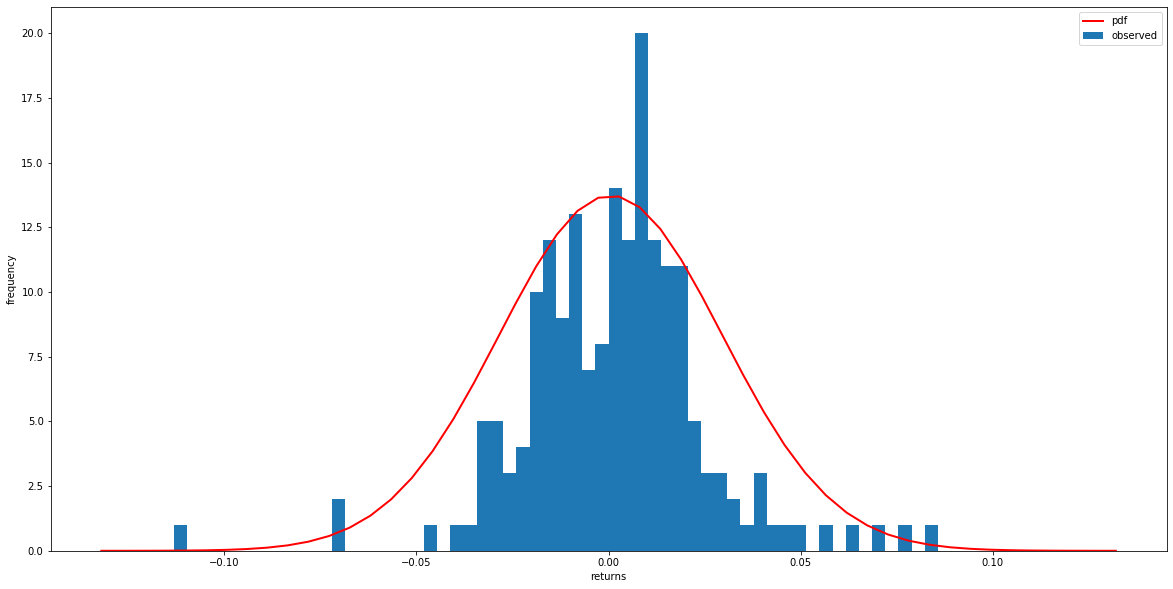

In [14]:
plt.figure(figsize=(20,10))
plt.hist(unp_r, bins=70, range=(-0.12,0.12), label='observed')
plt.xlabel('returns')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, unp_r.mean(), unp_r.std()), 'r',lw=2.0,label='pdf')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131455310>,
      dtype=object)

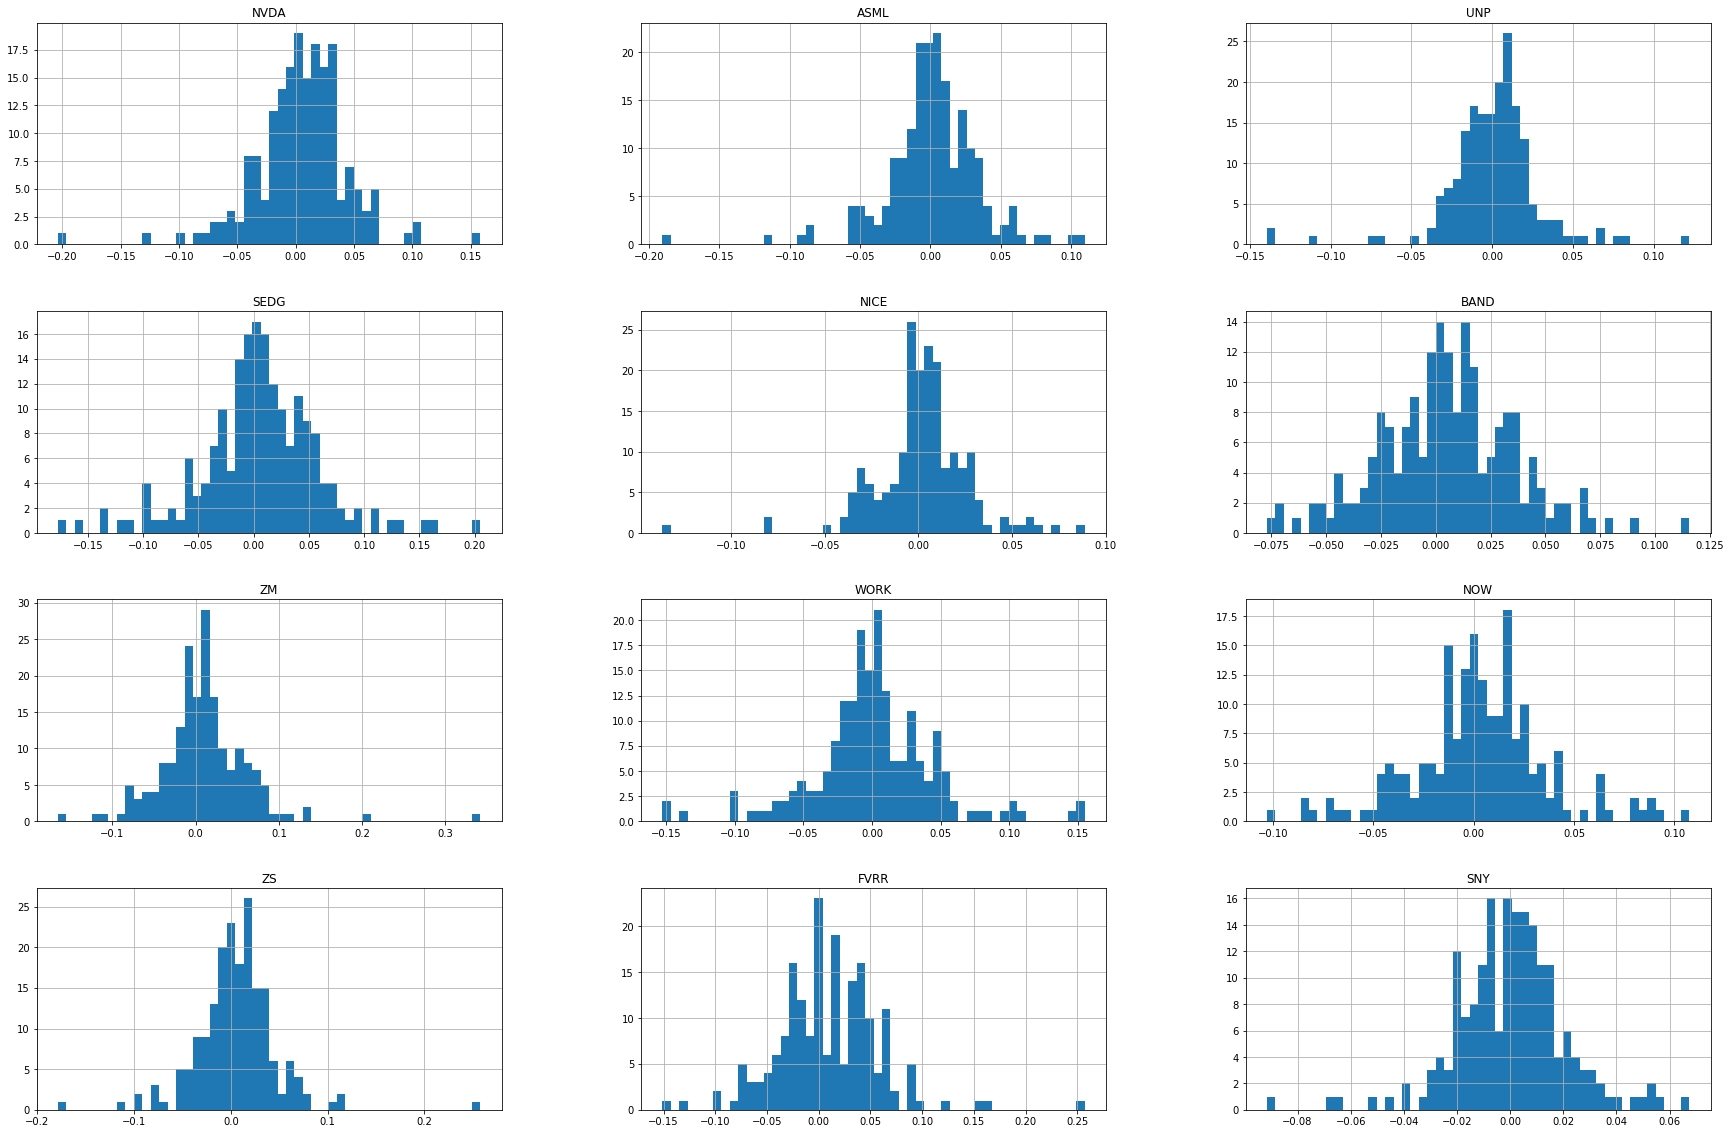

In [15]:
returns.hist(bins=50,figsize=(30,20))

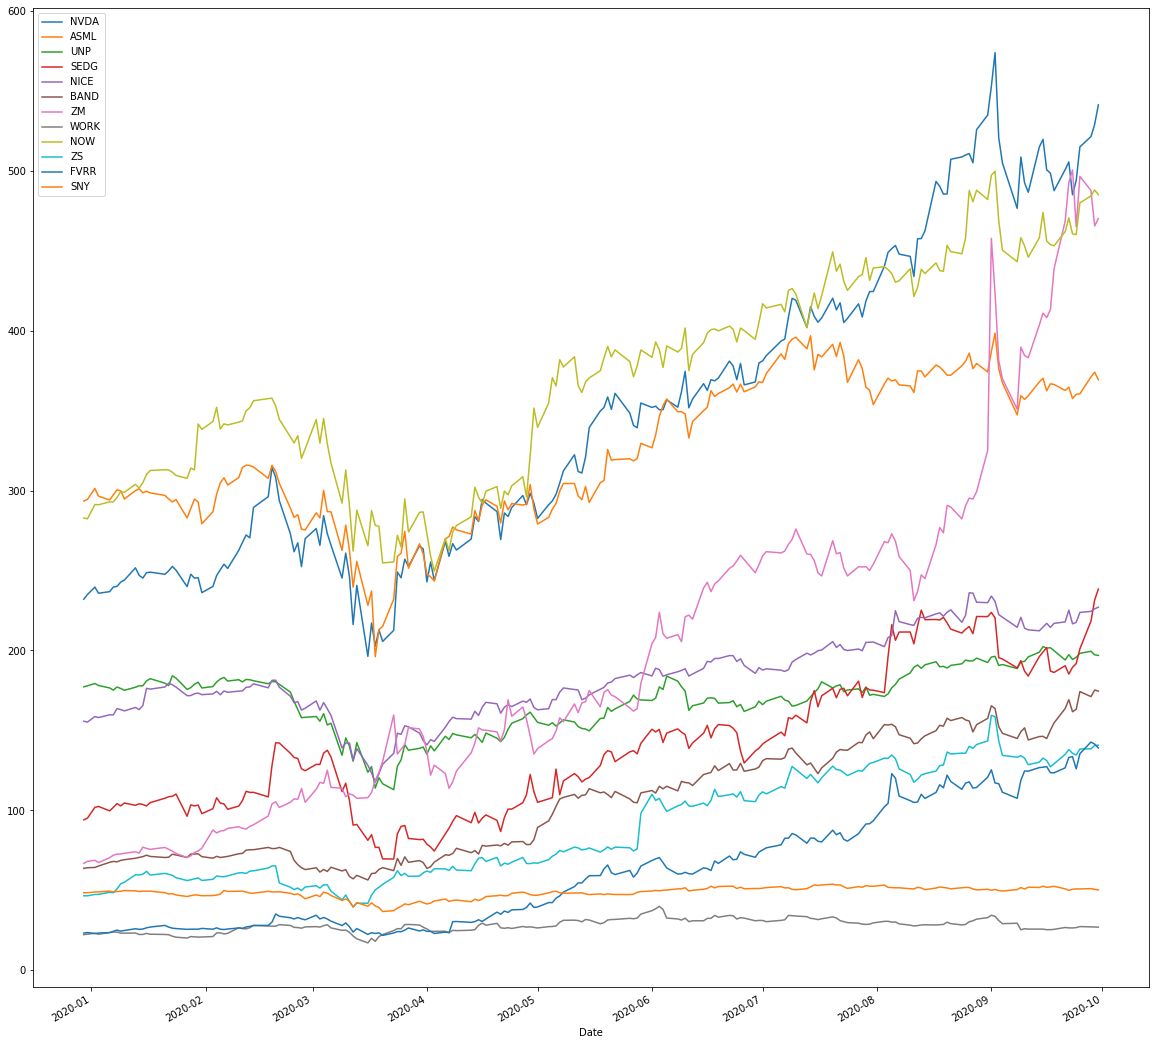

In [16]:
df.plot(figsize=(20,20))

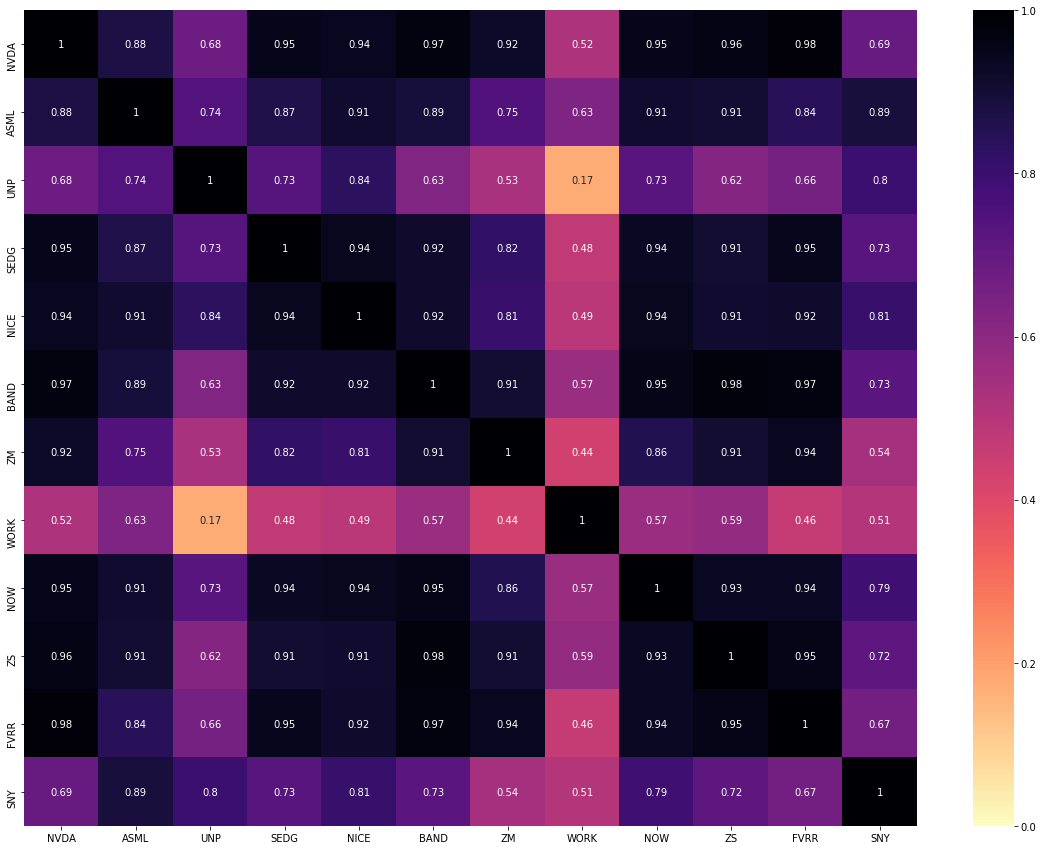

In [17]:
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True, vmin=0, vmax=1, cmap='magma_r', ax=ax)

In [18]:
for i in df:
    print(min(df[i]))

196.25
196.0
112.84
69.48
117.47
56.37
66.79
17.04
249.57
39.5
21.69
36.66


In [19]:
# is not iterating over whole array for some reason
def find_min_date(df):
        for i in df:
            return df[i].loc[df[i] == df[i].min()]
print(find_min_date(df))

Date
2020-03-16    196.25
Name: NVDA, dtype: float64


In [20]:
df.head()

,NVDA,ASML,UNP,SEDG,NICE,BAND,ZM,WORK,NOW,ZS,FVRR,SNY
Date,,,,,,,,,,,,
2019-12-30,232.01,293.40,177.21,94.00,155.66,63.67,66.79,22.21,282.81,46.50,23.18,48.39
2019-12-31,234.98,294.45,177.84,95.09,155.15,64.05,68.04,22.48,282.32,46.50,23.50,48.40
2020-01-02,239.59,301.30,179.29,101.81,158.62,64.22,68.72,23.02,291.24,47.33,22.90,48.87
2020-01-03,235.75,296.45,178.02,102.38,158.00,65.12,67.28,22.46,291.10,47.38,23.19,48.94
2020-01-06,236.74,294.09,176.50,99.63,159.69,67.43,70.32,23.52,292.87,48.70,23.50,49.42


In [29]:
# iterates here no problem to find lowest stock value after COVID and its date
for i in df:
    print(df[i].loc[df[i] >= df[i].min()])

Date
2019-12-30    232.01
2019-12-31    234.98
2020-01-02    239.59
2020-01-03    235.75
2020-01-06    236.74
               ...  
2020-09-24    493.92
2020-09-25    514.95
2020-09-28    521.40
2020-09-29    529.03
2020-09-30    541.22
Name: NVDA, Length: 191, dtype: float64
Date
2019-12-30    293.40
2019-12-31    294.45
2020-01-02    301.30
2020-01-03    296.45
2020-01-06    294.09
               ...  
2020-09-24    360.16
2020-09-25    360.48
2020-09-28    371.06
2020-09-29    374.00
2020-09-30    369.27
Name: ASML, Length: 191, dtype: float64
Date
2019-12-30    177.21
2019-12-31    177.84
2020-01-02    179.29
2020-01-03    178.02
2020-01-06    176.50
               ...  
2020-09-24    195.67
2020-09-25    198.15
2020-09-28    199.45
2020-09-29    197.24
2020-09-30    196.87
Name: UNP, Length: 191, dtype: float64
Date
2019-12-30     94.00
2019-12-31     95.09
2020-01-02    101.81
2020-01-03    102.38
2020-01-06     99.63
               ...  
2020-09-24    191.73
2020-09-25    200.96


In [22]:
# Finds previous max stock value, before crash
df2 = df.loc[:"2020-04-01"]
for i in df2:
    print(df2[i].loc[df2[i] == df2[i].max()])

Date
2020-02-19    314.27
Name: NVDA, dtype: float64
Date
2020-02-12    315.84
Name: ASML, dtype: float64
Date
2020-01-23    184.13
Name: UNP, dtype: float64
Date
2020-02-20    142.2
Name: SEDG, dtype: float64
Date
2020-02-20    181.36
Name: NICE, dtype: float64
Date
2020-02-21    76.75
Name: BAND, dtype: float64
Date
2020-03-23    159.56
Name: ZM, dtype: float64
Date
2020-03-27    28.58
Name: WORK, dtype: float64
Date
2020-02-19    357.72
Name: NOW, dtype: float64
Date
2020-02-20    65.18
Name: ZS, dtype: float64
Date
2020-02-20    35.11
Name: FVRR, dtype: float64
Date
2020-02-06    49.81
Name: SNY, dtype: float64


In [51]:
# Returns the the number of periods before returning to previous high
df3 = df.loc["2020-04-01":]
for i in df3:
    print(np.count_nonzero(df3[i].loc[df3[i] <= df2[i].max()]))

29
34
90
48
36
10
25
49
23
9
13
46
